### Classification with MNIST Dataset and VGG-style network
This script sets up a VGG-style network to classify digits from the MNIST dataset.

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


Use a Keras utility function to load the MNIST dataset.  We select only zeros and ones to do binary classification.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

Resize the images to vectors and convert their datatype and range.

In [3]:
x_train = np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = x_train*2.-1.
x_test = x_test*2.-1.

Build a multi-class classifier model.

In [4]:
model = Sequential()
model.add(Conv2D(64,3,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,3,padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
__________

Set up the model to optimize the binary crossentropy loss using stochastic gradient descent.

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Optimize the model over the training data.

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 41s - loss: 1.2636 - acc: 0.6649 - val_loss: 0.1931 - val_acc: 0.9427
Epoch 2/20
60000/60000 [==============================] - 40s - loss: 0.1435 - acc: 0.9563 - val_loss: 0.0907 - val_acc: 0.9725
Epoch 3/20
60000/60000 [==============================] - 39s - loss: 0.0845 - acc: 0.9738 - val_loss: 0.0701 - val_acc: 0.9777
Epoch 4/20
60000/60000 [==============================] - 39s - loss: 0.0628 - acc: 0.9805 - val_loss: 0.0544 - val_acc: 0.9811
Epoch 5/20
60000/60000 [==============================] - 40s - loss: 0.0513 - acc: 0.9845 - val_loss: 0.0433 - val_acc: 0.9845
Epoch 6/20
60000/60000 [==============================] - 40s - loss: 0.0433 - acc: 0.9865 - val_loss: 0.0452 - val_acc: 0.9854
Epoch 7/20
60000/60000 [==============================] - 39s - loss: 0.0368 - acc: 0.9889 - val_loss: 0.0436 - val_acc: 0.9855
Epoch 8/20
60000/60000 [==============================

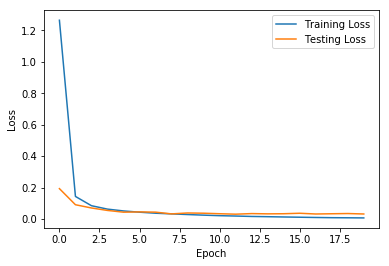

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

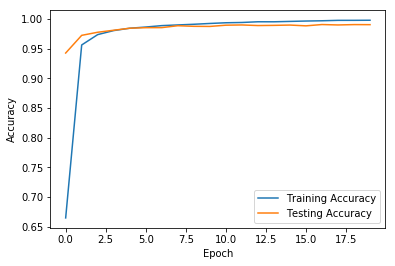

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()